### What is Exploratory Data Analysis?


Exploratory Data Analysis(EDA) is an approach to analyzing datasets to summarize their main characteristics.

By using EDA, we can understand the dataset easily, find patterns, identify outliers and explore the relationship between variables by using non-graphical and graphical techniques.

EDA also helps us to choose which feature should be considered to use for our machine learning model. (aka feature selection)

Now, we know that Exploratory Data Analysis (EDA) is a very important part of a data science project to understand data and get the intuition behind each variable.

In this post, I will be focusing on step-by-step exploratory data analysis to explain EDA smoothly and concisely.

We will use the Medical Cost Personal Dataset to perform our analysis. You can find the dataset from Kaggle by clicking the data

Let’s get started!

### Table of Contents

- Understanding Business Case
- Variable Description
- Data Understanding
- Data Cleaning
- Data Visualization

### Understanding Business Problem

- Our business case is to predict customer charges for an insurance company based on given variables. So that the company can decide how much they charge people correctly.

### Variable Description

After understanding the business case, we need to know our variables before analyzing them. Thus we have a clear understanding as we go further.

I passed the gathering data step since we already have ready to use data from Kaggle

Age: Age of the primary beneficiary

Sex: Insurance contractor gender, female, male

BMI: Body mass index, providing an understanding of the body, weights that are relatively high or low relative to height,
an objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

Children: Number of children covered by health insurance / Number of dependents

Smoker: Smoking

Region: the beneficiary’s residential area in the US, northeast, southeast, southwest and northwest.

Charges: Individual medical costs billed by health insurance

### Data Understanding
###### Now we understood our business case and imported the data we need in CSV format. The next step is importing the necessary libraries. I almost every time use Jupyter Notebook for my analysis.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
sns.set_style('whitegrid') # set style for visualization
import warnings # ignore warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


###### df.info() method returns information about the DataFrame including the index data type and columns, non-null values, and memory usage.

###### We see that we have 7 variables and 1338 observations for the dataset. Seems like there are no missing values in the data frame. We can also see the data types and their count by using df.info()

In [4]:
df.shape

(1338, 7)

###### We see that our dataset has 1338 observations and 7 variables.

###### df.shape() returns a tuple that represents the dimensions of the data frame.

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

###### If we want to see only the variable names, then we can use the df.columns method to get all the names.

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


df.describe() method generates descriptive statistics for us. For numeric data, the result’s index will include count, mean, std, min, max as well as lower, 50(median) and upper percentiles.

We can easily notice that the minimum age is 18 and the maximum age is 64. We can also see mean and median values of age are almost the same.

I also noticed that the maximum charge value is 63.770 which might be an unusual value. We can investigate this in the data visualization part.

( With describe method, we can also understand if our data is skewed or not looking at the range of quantiles )

In [7]:
df.describe(include = 'O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


For object data (e.g. strings or timestamps), the result’s index will include count, unique, top, and freq. The top is the most common value. The freq is the most common value’s frequency. Timestamps also include the first and last items.

We see that the most frequent value for sex is male and shown in the dataset 676 times.

There are 4 unique regions in our dataset and the most frequent value is southeast and 364 times counted in the data.

Most people are not smokers with a number of 1064 observations.

In [8]:
list(df.sex.unique())

['female', 'male']

We can also see unique values in discrete variable using .unique() method.

### Data Cleaning
In this part of the EDA. We will check ;

- Missing Values
- Duplicated Values
###### The purpose of data cleaning is to get our data ready to analyze and visualize.



In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

When combining .isnull() method with .sum() we can sum up all the missing values for each variables.

Luckily, there are no missing values in this dataset. We will now proceed to analyze the data, observe patterns, and identify outliers with the help of visualization methods.

In [10]:
df[df.duplicated(keep='first')]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


Dataset has only one duplicated observation. We can simply drop this row using the drop_duplicates() method.

In [11]:
df.drop_duplicates(keep='first',inplace=True)

We use some attributes inside the parenthesis;

keep = ‘first’ is used to keep the first row of duplicated ones.

inplace = True is used to change the data frame permanently. If we didn't use inplace attributes, we would not remove the duplicated observation from the dataset.

### Data Visualization

A picture is worth a thousand words

Now, We understood our dataset in general and checked the missing values. We also deleted duplicated values from the data frame.

The next part of this journey is data visualization! Our goal is to perform univariate, bivariate and multivariate analysis to see the distribution and relationship between variables.

We will use the seaborn library for statistical data visualization. Seaborn is a data visualization library based on matplotlib and my favorite with ease of use.

#### Univariate Analysis

The purpose of the univariate analysis is to understand the distribution of values for a single variable.

We can perform univariate analysis with 3 options :

- Summary Statistics
- Frequency Distributions Table
- Charts ( Boxplot, Histogram, Barplot, Pie Chart)

We will perform univariate analysis by using visualization techniques.

Univariate Analysis for Numerical Features

Charges

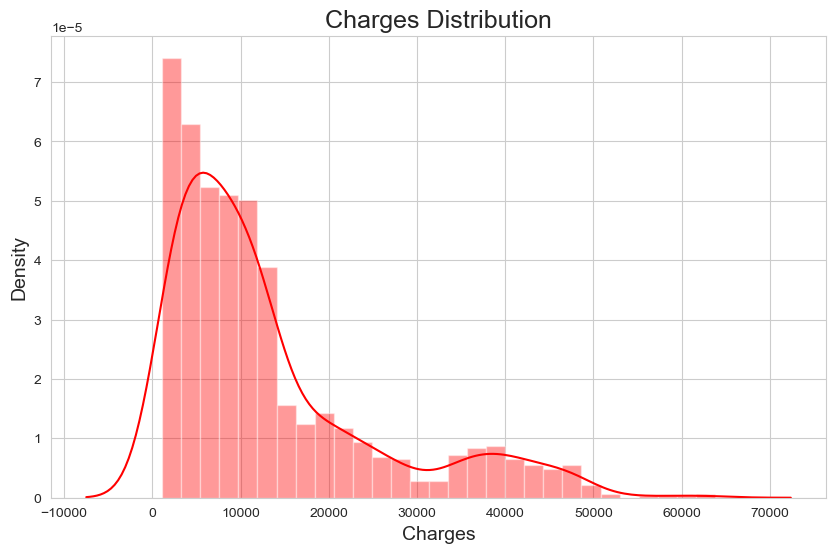

In [12]:
plt.figure(figsize=(10,6))
sns.distplot(df.charges,color='r')
plt.title('Charges Distribution',size=18)
plt.xlabel('Charges',size=14)
plt.ylabel('Density',size=14)
plt.show()

Let’s begin with sns.distplot() function. Displot stands for distribution plot and shows us distribution and kernel density estimation by default.

The distribution plot shows us how our variable is distributed.

On the other hand, kernel density estimation allows us to estimate the probability density function from the numerical variables. So that we can easily see the probability of getting each value visually.

We see that our data looks like the right(positive) skewed. Most of the charges are between 0 – 10000 dollars.

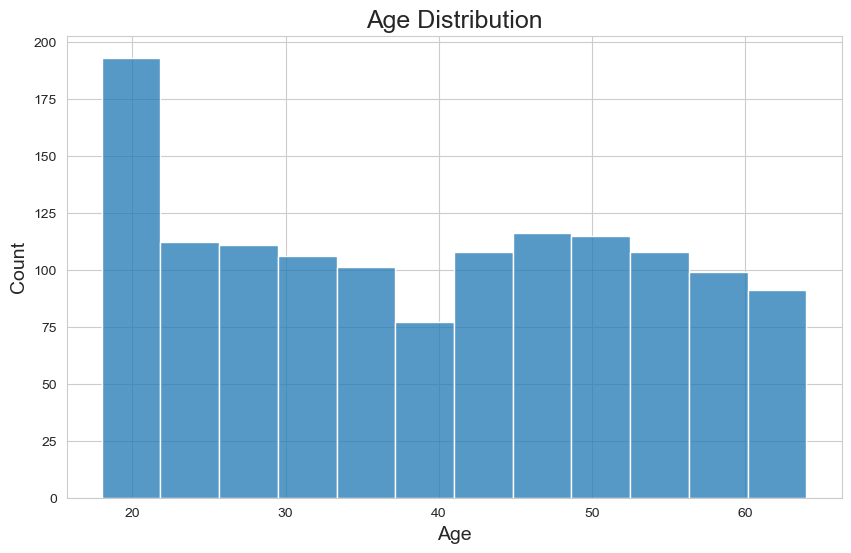

In [13]:
# Age


plt.figure(figsize=(10,6))
sns.histplot(df.age)
plt.title('Age Distribution',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Count',size=14)
plt.show()

We see that most of the customers are 18–19 years old. The distribution looks like a uniform distribution.

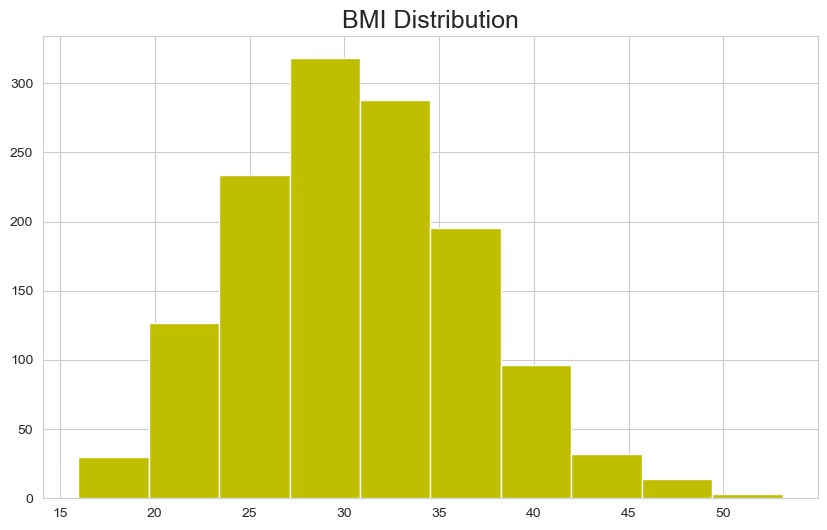

In [14]:
# BMI

plt.figure(figsize=(10,6))
plt.hist(df.bmi,color='y')
plt.title('BMI Distribution',size=18)
plt.show()

As seen in the code block, Matplotlib also gives us an option to create a histogram.

BMI of people seems like a normal distribution. That’s what we expected right? Most people have BMI between 27 -34 years old.



### BOXPLOT

A boxplot is a standardized way of displaying the dataset based on a five-number summary: the minimum, the maximum, the sample median, and the first and third quartiles.

It also helps us to detect outliers using IQR (Inter Quantile Range) method.

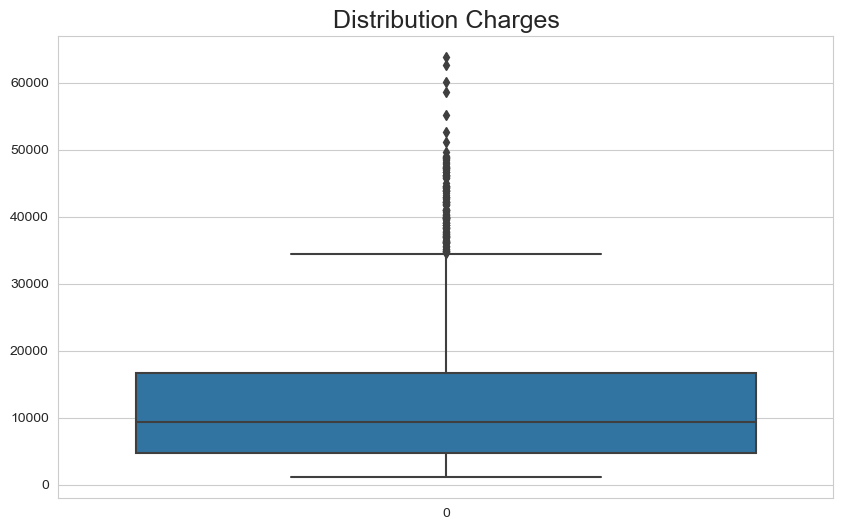

In [15]:
plt.figure(figsize = (10,6))
sns.boxplot(df.charges)
plt.title('Distribution Charges',size=18)
plt.show()

By using a boxplot, We can easily interpret our variable if it has outliers. Outliers can be easily removed from our dataset. But we reconsider before removing any of them.

We need to examine or ask domain expertise if they are anomalies or not.

In [16]:
# A common way to remove outliers is to use IQR Method.

Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
print('IQR =', IQR)

IQR = 11911.37345


After obtaining Inter Quantile Range, we can use the IQR method to see outliers or remove them from the dataset.

In [17]:
df[(df['charges']< Q1-1.5* IQR) | (df['charges']> Q3+1.5* IQR)]

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


Now We can easily detect outliers with a boxplot or using python code. In this example. I will proceed with my analysis without removing outliers.

### Univariate Analysis for Categorical Features

A bar chart is commonly used to visualize categorical features. We will use sns.countplot() method for sex, children, smoker and region variables.

### Gender

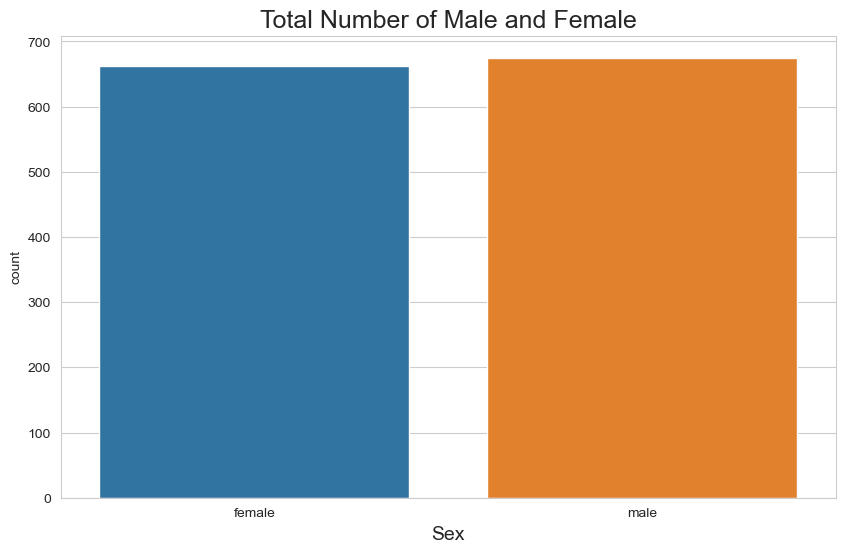

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'sex', data = df)
plt.title('Total Number of Male and Female',size=18)
plt.xlabel('Sex',size=14)
plt.show()

Female and Male customers have almost the same number within the variable.

### Children

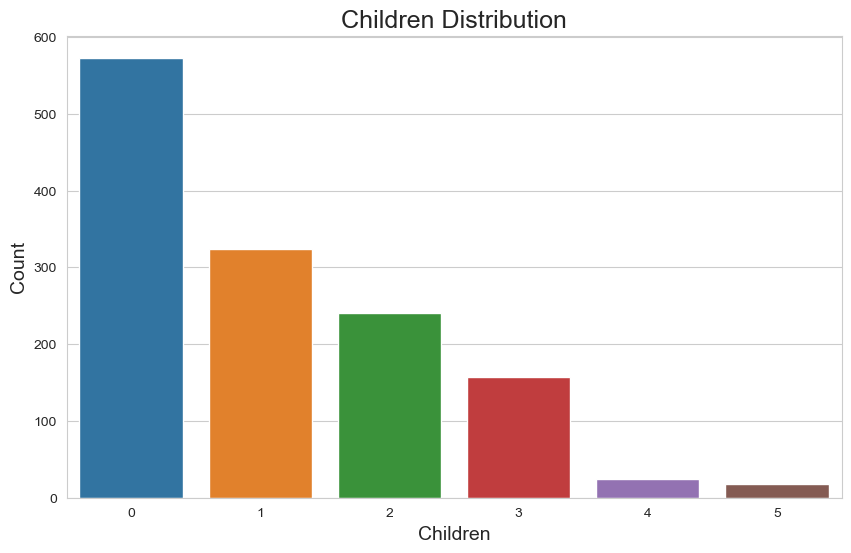

In [19]:
plt.figure(figsize = (10,6))
sns.countplot(x= 'children', data = df)
plt.title('Children Distribution',size=18)
plt.xlabel('Children',size=14)
plt.ylabel('Count',size=14)
plt.show()

The majority of the people do not have any children.

Few people have 4 and 5 children.

### Smoker

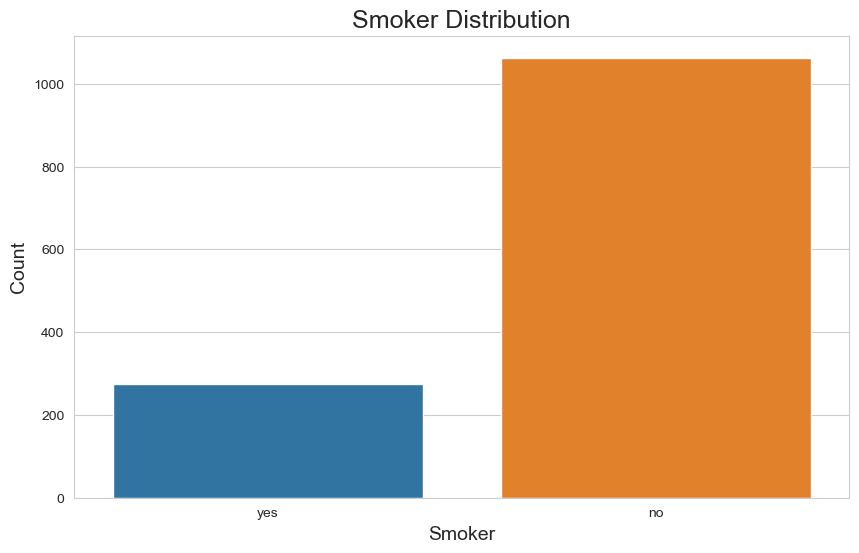

In [20]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'smoker', data = df)
plt.title('Smoker Distribution',size=18)
plt.xlabel('Smoker',size=14)
plt.ylabel('Count',size=14)
plt.show()

The number of smokers is almost 4 times more than non-smokers. I showed you the way to see numbers in a non-graphical way below.

Using the value_counts method, we can easily see the number of each value within the variable.

In [21]:
df.smoker.value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

### Region

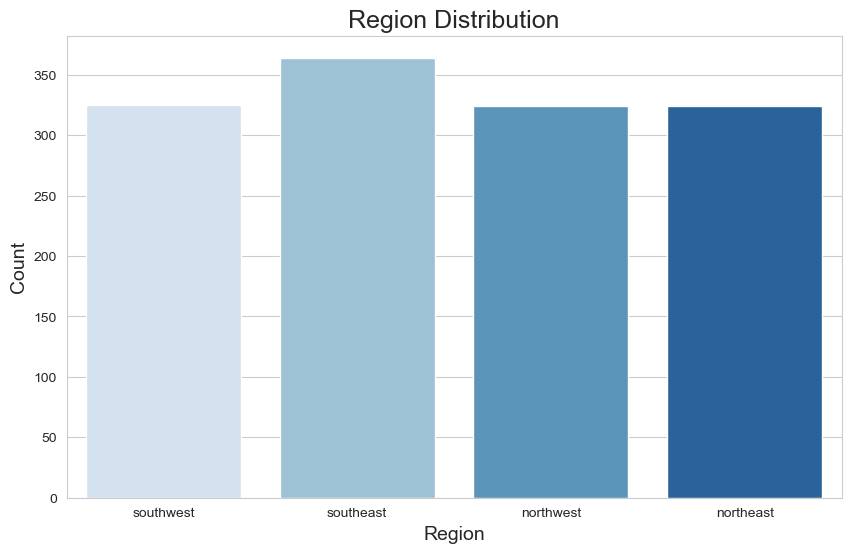

In [22]:

plt.figure(figsize = (10,6))
sns.countplot(x = 'region', data = df, palette='Blues')
plt.title('Region Distribution',size=18)
plt.xlabel('Region',size=14)
plt.ylabel('Count',size=14)
plt.show()

All four regions are almost equally distributed. The number of people from the southeast is slightly more than others.

### Bivariate Analysis

Bivariate analysis is the analysis of exactly two variables. We will use bivariate analysis to find relationships between two variables.

For bivariate analysis, we usually use boxplot(categorical vs numerical), scatterplot(numerical vs numerical), or contingency table(categorical vs categorical).

### Age vs Charges

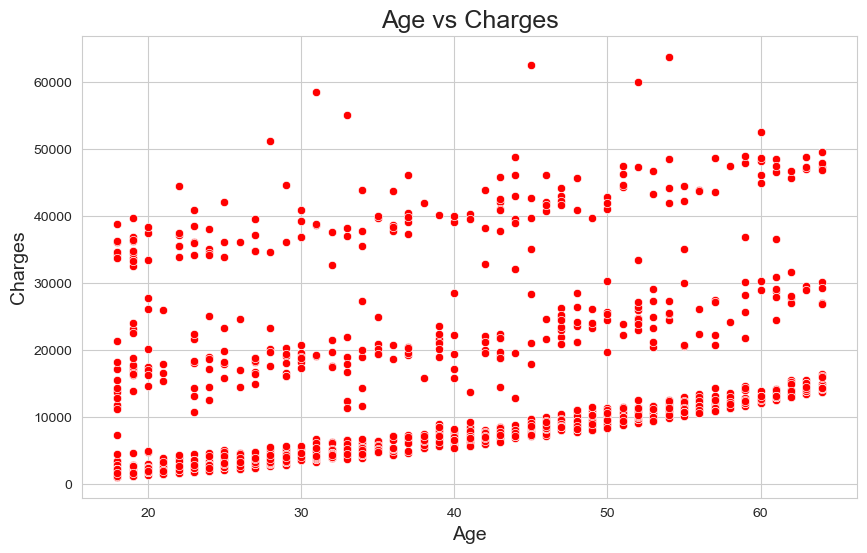

In [23]:


plt.figure(figsize = (10,6))
sns.scatterplot(x='age',y='charges',color='r',data=df)
plt.title('Age vs Charges',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Charges',size=14)
plt.show()

A scatterplot is a type of data display that shows the relationship between two numerical variables.

We see that there is a weak positive relationship between age and charges values. As age increases charges also slightly increase.

.corr() method also shows us the relationship between the two variables.

In [24]:
print('Correlation between age and charges is : {}'.format(round(df['age'].corr(df['charges']),3)))

Correlation between age and charges is : 0.298


In [25]:
# print('Correlation between age and charges is : {}'.format(round(df.corr()['age']['charges'],3)))

### Smoker vs Charges

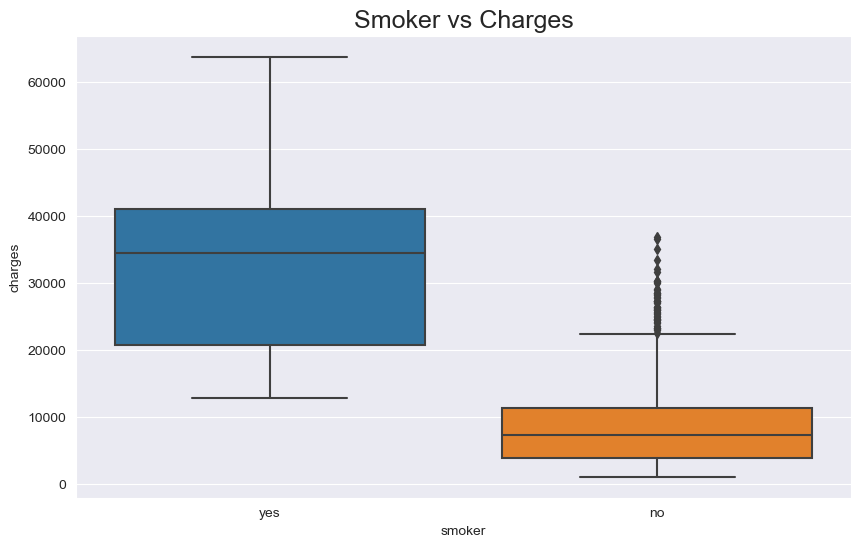

In [26]:
plt.figure(figsize = (10,6))
sns.set_style('darkgrid')
sns.boxplot(x='smoker',y='charges',data=df)
plt.title('Smoker vs Charges',size=18);

The boxplot shows us the cost of insurance for smokers is higher than for non-smokers.

Using Pairplot for Numerical Values


### PAIRPLOT

Pairplot is another awesome method that shows us the relationship between two numerical values as well as the distribution of each variable.

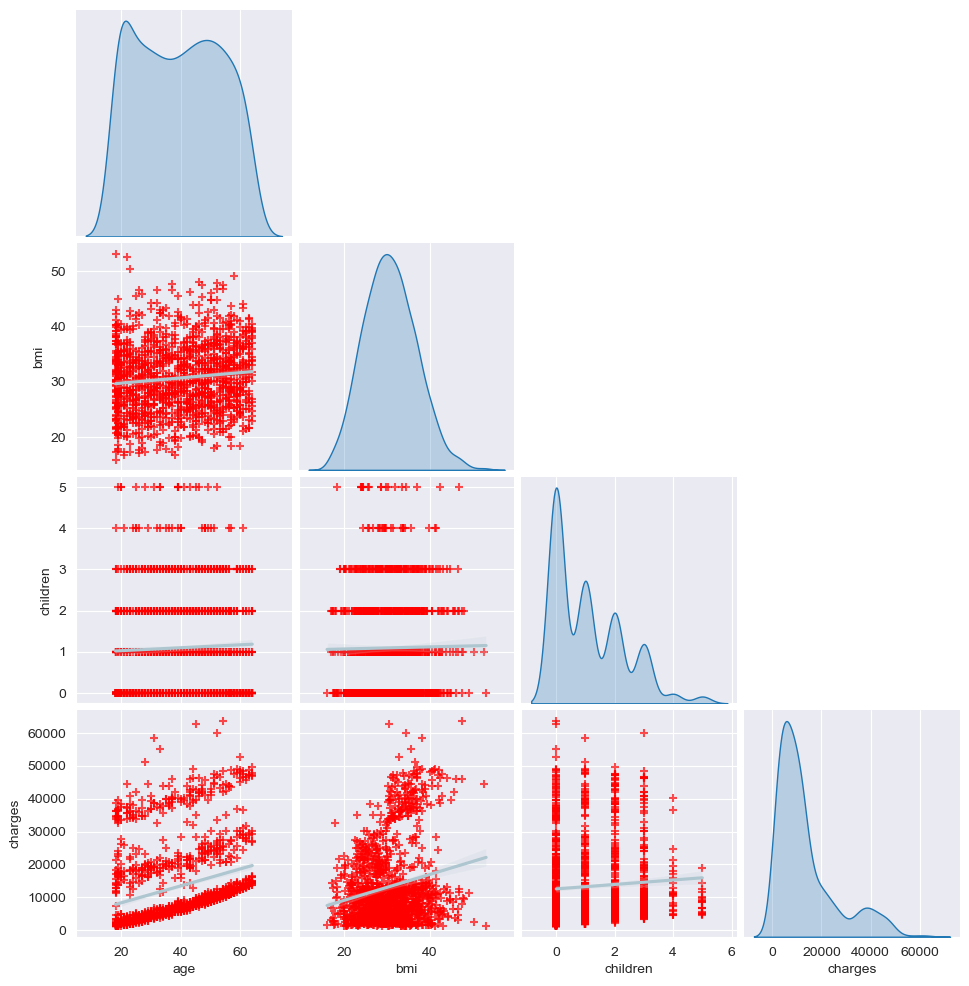

In [27]:
sns.pairplot(df, 
                 markers="+",
                 diag_kind="kde",
                 kind='reg',
                 plot_kws={'line_kws':{'color':'#aec6cf'}, 
                           'scatter_kws': {'alpha': 0.7, 
                                           'color': 'red'}},
                 corner=True);

###  Multivariate Analysis

###### Correlation

Correlation is used to test relationships between quantitative variables or categorical variables. It’s a measure of how things are related. The table above shows us how we can interpret correlation coefficients.

As we said earlier, seaborn is an awesome library that helps us visualize our variables easily and clearly. The heatmap() method shows us the relationship between numeric variables.

There are different methods to calculate correlation coefficient ;

Pearson
Kendall
Spearman
We will combine the .corr() method with heatmap so that we will be able to see the relationship in the graph. .corr() method is used Pearson correlation by default.

However, before the correlation can be done between the variables, the categorical variables(sex, smoker and region columns) need to be converted to numeric value. 

In [28]:
# Conversion of categorical variables to numeric value

df['sex'] =pd.factorize(df['sex'])[0]
df['smoker'] =pd.factorize(df['smoker'])[0]
df['region'] =pd.factorize(df['region'])[0]

In [29]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


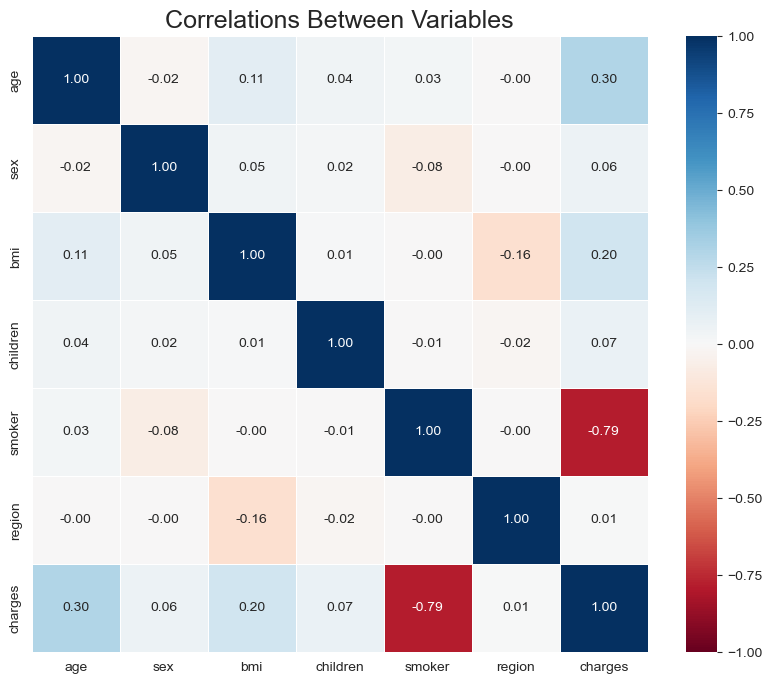

In [35]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(),annot=True,square=True,
            cmap='RdBu',
            vmax=1,
            vmin=-1,
           fmt='.2f',
           linewidths=0.5)
plt.title('Correlations Between Variables',size=18);
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

The heatmap shows us there is a correlation between age and charges. As the age increases insurance charges also increase or vice versa.

We can also see that there is a weak correlation between BMI and charges.

There is almost no relationship between children and charges.



### Conclusion
In this post, We examined our dataset using exploratory data analysis and try to understand each variable as well as their relationship with each other.

The main purpose of EDA is to help understand data before making any assumptions. EDA helps us to see distribution, summary statistics, relationships between variables and outliers.